<img src="https://studenthub.atu.ie/assets/ATU_Logo.fa93bf0a.svg" alt="ATU Logo" width="300" height="100">

# **Project for 2024 Programming for Data Analytics (PFDA) module.**

## 1. Introduction / About this project
This is the project for the 2024 Programming for Data Analytics (PFDA) module. A description of the project can be found [here](https://github.com/andrewbeattycourseware/PFDA-courseware/blob/main/labs/Project%20Description.pdf). Initially, I was going to do a project on aviation but struggled to find usable datasets that were free of charge. Since we so often talk about the weather here in Ireland due to its erratic nature, I decided to explore it through analytics, touching upon as many suggestions as possible as per the project brief.

## 2. Imported libraries & modules:

### 2.1 [Pandas](https://pandas.pydata.org/) for data frames:
A fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. 
### 2.2 [Matplotlib](https://matplotlib.org/stable/) for plotting:
A comprehensive library for creating static, animated, and interactive visualizations.
### 2.3 [Seaborn](https://seaborn.pydata.org/)
seaborn: statistical data visualization

In [11]:
# Data frames.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

## 3. Athenry weather station.
For the final assignment of the module, we analyzed the weather station in Athenry, which I have chosen to use again. This station records a diverse range of data points, as listed below the code cell in 3.1. Unfortunately, the Circular Road station, which is closest to where I live, and the station in Oughterard, do not include temperature measurements, for example. The data was downloaded from this website: https://www.met.ie/climate/available-data/historical-data.

### 3.1 Inspecting the dataset.

In [12]:
# Load the data sets.
file_path = r"C:\Users\User\ATU\PFDA\Project\mly1875.csv"
df = pd.read_csv(file_path, on_bad_lines='skip')

file_path2 = r"C:\Users\User\ATU\PFDA\Project\london0_23_weather_data.csv"
df2 = pd.read_csv(file_path2, on_bad_lines='skip')

df

,Station Name: ATHENRY
0,Station Height: 40 M
1,year: - Year
2,month: - Month
3,rain: - Precipitation Amount (mm)
4,meant: - Mean Air Temperature (C)
5,maxtp: - Maximum Air Temperature (C)\t
6,mintp: - Minimum Air Temperature (C)\t
7,mnmax: - Mean Maximum Temperature (C)
8,mnmin: - Mean Minimum Temperature (C)
9,gmin: - Grass Minimum Temperature (C)


In [26]:
print(df.dtypes)

year       int64
month      int64
meant    float64
maxtp    float64
mintp    float64
mnmax    float64
mnmin    float64
rain     float64
gmin      object
wdsp     float64
maxgt      int64
sun       object
dtype: object


In [14]:
type(df)

pandas.core.frame.DataFrame

### 3.2 Cleaning the dataset.

In [15]:
df = pd.read_csv(file_path, skiprows=19)

df

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,2010,3,5.5,13.9,-5.7,9.9,1.1,73.3,-6.4,6.8,45,
1,2010,4,8.8,18.5,-1.8,13.8,3.9,76.8,-2.3,6.3,40,
2,2010,5,10.4,24.5,0.2,15.6,5.2,38.4,-0.3,6.1,28,
3,2010,6,14.7,22.1,4.3,19.5,9.9,28.3,3.6,6.6,28,
4,2010,7,15.1,20.0,6.9,18.2,12.0,155.5,7.3,7.7,37,
...,...,...,...,...,...,...,...,...,...,...,...,...
172,2024,7,14.6,22.2,6.3,19.0,10.3,71.5,3.6,5.9,26,
173,2024,8,14.7,21.7,5.8,18.4,11.0,159.0,2.4,7.6,33,
174,2024,9,12.9,24.0,2.1,17.0,8.7,46.6,-0.2,6.5,33,
175,2024,10,11.0,19.1,-0.5,14.8,7.1,112.7,-2.8,6.7,51,


The data frames starts in March 2010 so I decided to remove those rows as well 2024 to only have complete years to work with:

In [16]:
df = df[df['year'].isin(range(2011, 2024))]
df

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
10,2011,1,3.1,12.1,-6.3,6.6,-0.4,110.8,-9.9,5.7,37,
11,2011,2,6.4,14.2,-3.6,10.0,2.8,146.5,-6.0,7.7,48,
12,2011,3,6.3,16.3,-4.8,11.2,1.4,44.2,-7.9,6.0,52,
13,2011,4,11.0,21.8,2.0,15.9,6.0,66.9,-0.7,7.1,34,
14,2011,5,11.0,18.3,4.1,14.3,7.8,117.6,0.7,11.1,47,
...,...,...,...,...,...,...,...,...,...,...,...,...
161,2023,8,15.4,24.9,6.6,19.1,11.7,129.1,4.7,6.8,33,
162,2023,9,14.6,27.7,3.8,19.1,10.2,148.2,1.7,6.1,36,
163,2023,10,11.0,20.7,-0.3,14.7,7.4,179.9,-3.1,6.2,32,
164,2023,11,7.6,13.7,-3.8,10.8,4.5,113.5,-4.1,6.8,62,


Calculate average rainfall per year.

In [17]:
# Ensure the 'rain' column is numeric.
df['rain'] = pd.to_numeric(df['rain'], errors='coerce')

# Group by year and calculate average rainfall.
avg_rainfall_per_year = df.groupby('year')['rain'].mean().reset_index()

# Print the numeric output for each year's average rainfall.
print("Average Rainfall per Year:")
print(avg_rainfall_per_year)

Average Rainfall per Year:
    year        rain
0   2011  114.366667
1   2012  105.508333
2   2013   94.245455
3   2014  105.358333
4   2015  131.316667
5   2016   89.733333
6   2017  100.000000
7   2018   90.183333
8   2019  118.900000
9   2020  123.483333
10  2021   93.683333
11  2022   98.208333
12  2023  132.516667


C:\Users\User\AppData\Local\Temp\ipykernel_3328\2093484167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rain'] = pd.to_numeric(df['rain'], errors='coerce')


Plot average rainfall per year on bar charts.

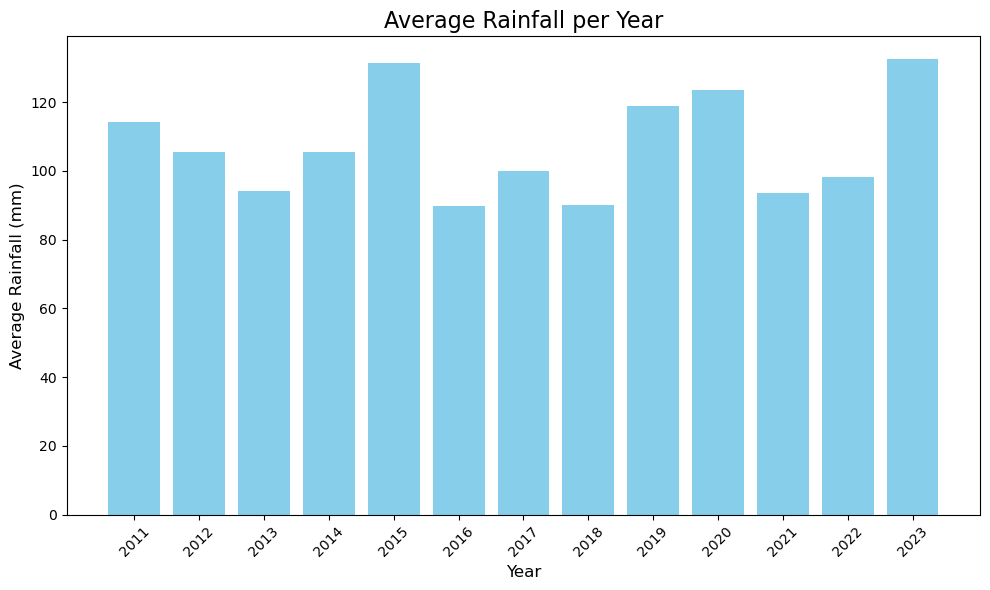

In [18]:
# Plot the bar chart for all years.
plt.figure(figsize=(10, 6))  # Set the figure size.
plt.bar(avg_rainfall_per_year['year'], avg_rainfall_per_year['rain'], color='skyblue')

# Title and labels.
plt.title('Average Rainfall per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rainfall (mm)', fontsize=12)
plt.xticks(avg_rainfall_per_year['year'], rotation=45)  # Rotate x-axis labels for better readability.

# Plot.
plt.tight_layout()
plt.show()

Average rainfall per year oscillates between under 100 mm in some years to way over 120 mm in other years. Let's have a look at the minimum and maximum averages per year.

In [19]:
# Ensure the 'rain' column is numeric.
df['rain'] = pd.to_numeric(df['rain'], errors='coerce')

# Group by year and calculate average, max, and min rainfall.
rainfall_stats = df.groupby('year')['rain'].agg(['mean', 'max', 'min']).reset_index()

# Print the numeric output for each year's rainfall statistics.
print("Rainfall Statistics per Year:")
print(rainfall_stats)

Rainfall Statistics per Year:
    year        mean    max   min
0   2011  114.366667  160.3  44.2
1   2012  105.508333  175.6  30.5
2   2013   94.245455  220.3  36.9
3   2014  105.358333  182.5  10.4
4   2015  131.316667  299.4  44.9
5   2016   89.733333  145.2  49.2
6   2017  100.000000  157.7  13.5
7   2018   90.183333  173.2  25.2
8   2019  118.900000  297.3  46.1
9   2020  123.483333  248.5  46.8
10  2021   93.683333  167.3  23.9
11  2022   98.208333  199.3  39.0
12  2023  132.516667  224.1  42.0


C:\Users\User\AppData\Local\Temp\ipykernel_3328\2167224169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rain'] = pd.to_numeric(df['rain'], errors='coerce')


Create plot to display mean minimum and maximum in bar charts and overlay with line chart for average.

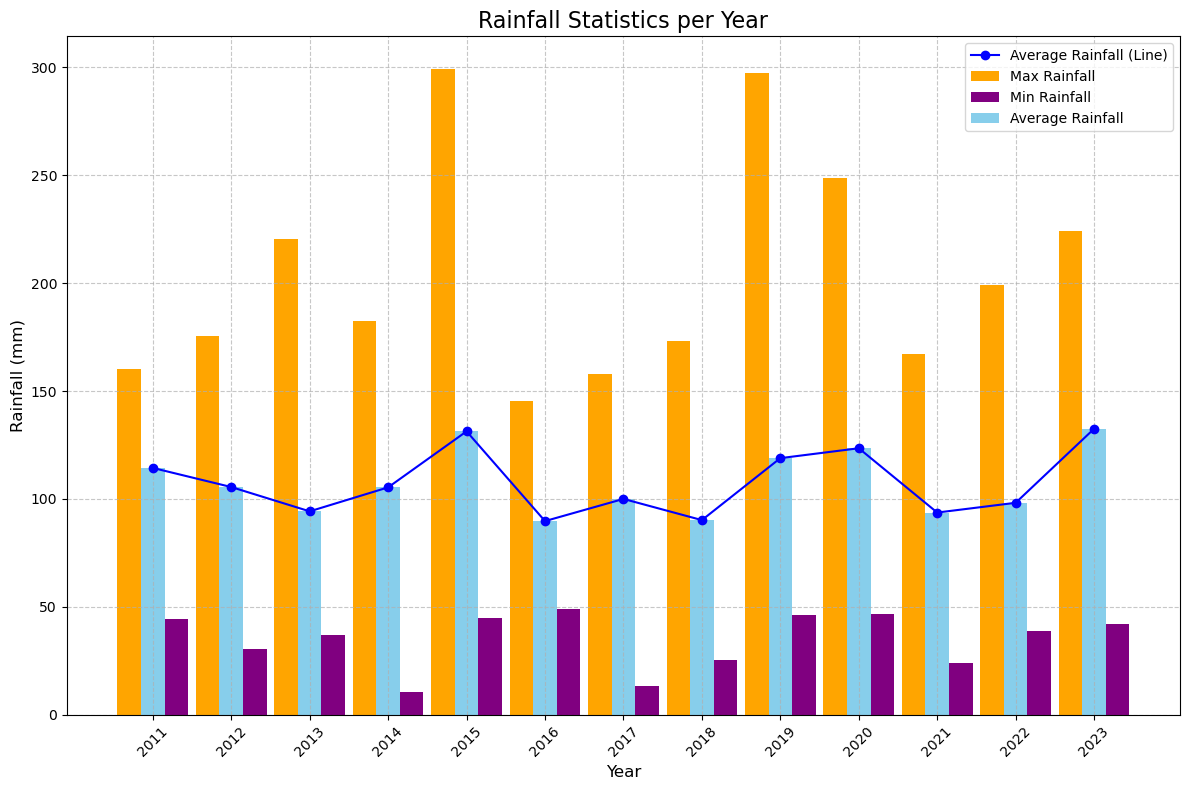

In [20]:
# Plot.
plt.figure(figsize=(12, 8))  # Set the figure size.

# Bar chart for max rainfall.
plt.bar(rainfall_stats['year'] - 0.3, rainfall_stats['max'], width=0.3, color='orange', label='Max Rainfall')

# Bar chart for min rainfall.
plt.bar(rainfall_stats['year'] + 0.3, rainfall_stats['min'], width=0.3, color='purple', label='Min Rainfall')

# Bar chart for average rainfall.
plt.bar(rainfall_stats['year'], rainfall_stats['mean'], width=0.3, color='skyblue', label='Average Rainfall')

# Line chart for average rainfall.
plt.plot(rainfall_stats['year'], rainfall_stats['mean'], marker='o', color='blue', linestyle='-', label='Average Rainfall (Line)')

# Title and labels.
plt.title('Rainfall Statistics per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)

# X-axis.
plt.xticks(rainfall_stats['year'], rotation=45)

# Legend.
plt.legend()

# Add a grid for better visualization.
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

In [21]:
# Ensure the 'meant' column is numeric.
df['meant'] = pd.to_numeric(df['meant'], errors='coerce')

# Group by year and calculate average, max, and min temperature.
temp_stats = df.groupby('year')['meant'].agg(['mean', 'max', 'min']).reset_index()

# Print the numeric output for each year's temperature statistics.
print("Temperature Statistics per Year:")
print(temp_stats)

Temperature Statistics per Year:
    year       mean   max  min
0   2011   9.775000  14.1  3.1
1   2012   9.525000  15.5  5.4
2   2013   9.625000  17.5  3.8
3   2014  10.041667  16.1  5.3
4   2015   9.358333  13.5  4.5
5   2016   9.750000  15.3  4.7
6   2017   9.925000  14.4  5.6
7   2018   9.750000  16.0  3.6
8   2019   9.825000  15.9  5.9
9   2020   9.908333  15.6  5.0
10  2021  10.225000  17.3  3.9
11  2022  10.266667  16.2  3.4
12  2023  10.800000  16.7  6.0


C:\Users\User\AppData\Local\Temp\ipykernel_3328\4068120341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['meant'] = pd.to_numeric(df['meant'], errors='coerce')


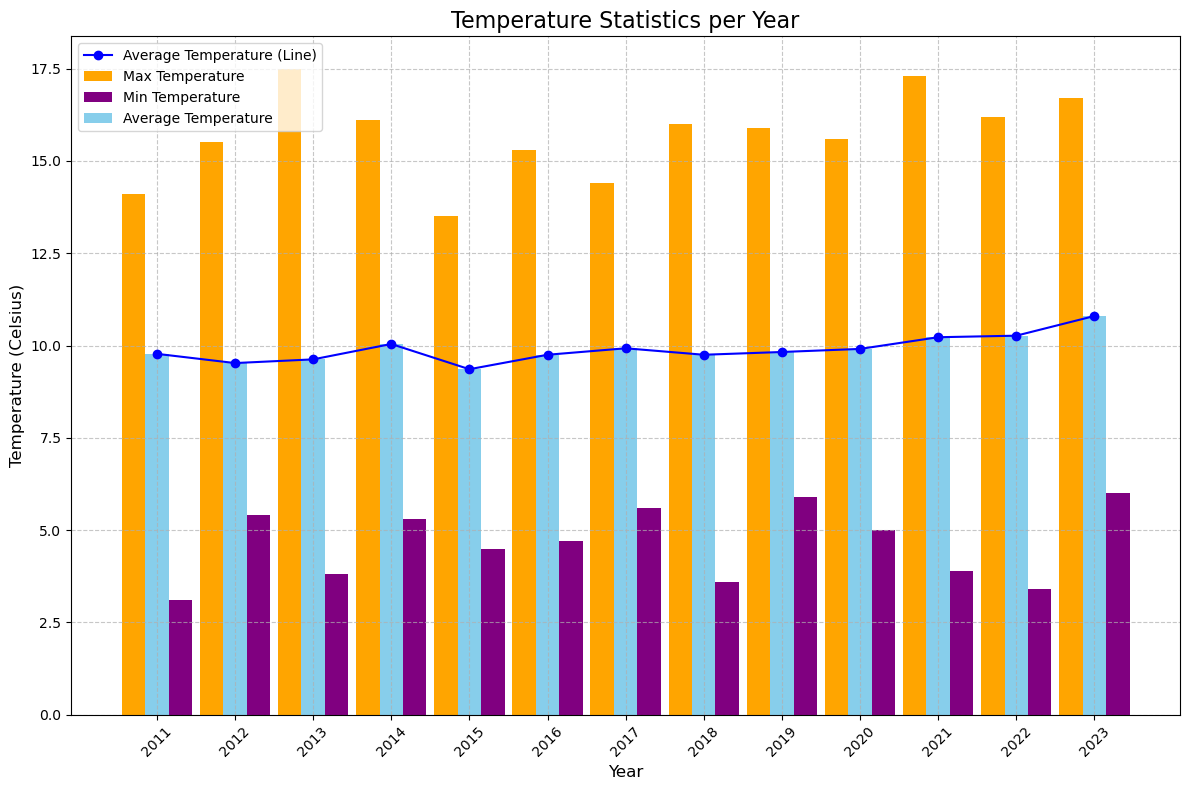

In [22]:
# Plot.
plt.figure(figsize=(12, 8))  # Set the figure size.

# Bar chart for max temperature.
plt.bar(temp_stats['year'] - 0.3, temp_stats['max'], width=0.3, color='orange', label='Max Temperature')

# Bar chart for min temperature.
plt.bar(temp_stats['year'] + 0.3, temp_stats['min'], width=0.3, color='purple', label='Min Temperature')

# Bar chart for average temperature.
plt.bar(temp_stats['year'], temp_stats['mean'], width=0.3, color='skyblue', label='Average Temperature')

# Line chart for average temperature.
plt.plot(temp_stats['year'], temp_stats['mean'], marker='o', color='blue', linestyle='-', label='Average Temperature (Line)')

# Title and labels.
plt.title('Temperature Statistics per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (Celsius)', fontsize=12)

# X-axis.
plt.xticks(temp_stats['year'], rotation=45)

# Legend.
plt.legend()

# Add a grid for better visualization.
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

In [23]:
# Ensure the 'wdsp' column is numeric.
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

# Group by year and calculate average, max, and min temperature.
wdsp_stats = df.groupby('year')['wdsp'].agg(['mean', 'max', 'min']).reset_index()

# Print the numeric output for each year's temperature statistics.
print("Windspeed Statistics per Year:")
print(wdsp_stats)

Windspeed Statistics per Year:
    year      mean   max  min
0   2011  7.866667  11.1  5.7
1   2012  7.458333   9.5  6.4
2   2013  7.691667   9.8  5.6
3   2014  7.325000  10.4  4.9
4   2015  7.808333  10.3  5.7
5   2016  7.025000   8.4  5.7
6   2017  7.158333   8.9  6.1
7   2018  7.150000   8.9  5.9
8   2019  7.200000   8.6  6.1
9   2020  7.591667  10.9  6.3
10  2021  6.566667   9.1  4.9
11  2022  6.983333  10.4  5.7
12  2023  6.916667   8.8  5.9


C:\Users\User\AppData\Local\Temp\ipykernel_3328\2574189037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')


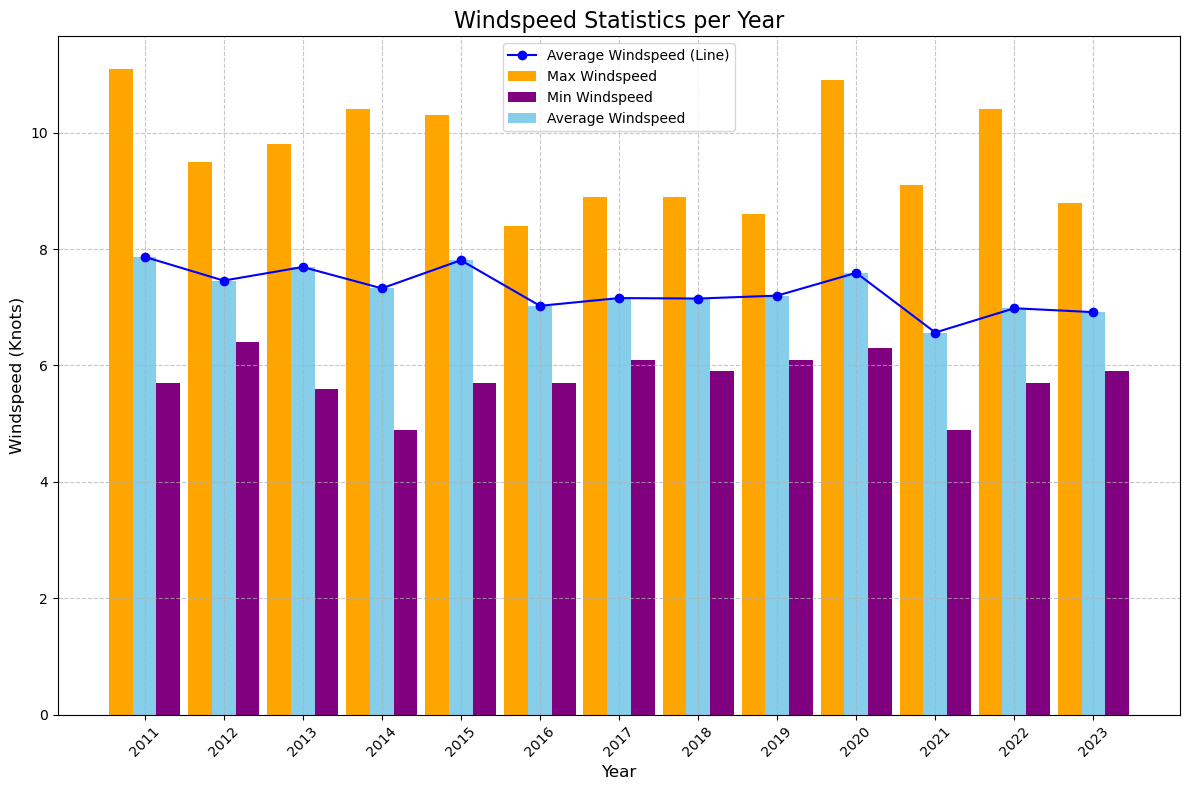

In [24]:
# Plot.
plt.figure(figsize=(12, 8))  # Set the figure size.

# Bar chart for max temperature.
plt.bar(wdsp_stats['year'] - 0.3, wdsp_stats['max'], width=0.3, color='orange', label='Max Windspeed')

# Bar chart for min temperature.
plt.bar(wdsp_stats['year'] + 0.3, wdsp_stats['min'], width=0.3, color='purple', label='Min Windspeed')

# Bar chart for average temperature.
plt.bar(wdsp_stats['year'], wdsp_stats['mean'], width=0.3, color='skyblue', label='Average Windspeed')

# Line chart for average temperature.
plt.plot(wdsp_stats['year'], wdsp_stats['mean'], marker='o', color='blue', linestyle='-', label='Average Windspeed (Line)')

# Title and labels.
plt.title('Windspeed Statistics per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Windspeed (Knots)', fontsize=12)

# X-axis.
plt.xticks(wdsp_stats['year'], rotation=45)

# Legend.
plt.legend()

# Add a grid for better visualization.
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

We will analyze the metrics of average rainfall, temperature, and wind speed to determine if there is any correlation among them

In [25]:
# Measure the correlation
np.corrcoef(rain, wdsp)

NameError: name 'rain' is not defined

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html